In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.0     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
library(tidytext)

In [3]:
board_games <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-12/board_games.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  game_id = col_double(),
  max_players = col_double(),
  max_playtime = col_double(),
  min_age = col_double(),
  min_players = col_double(),
  min_playtime = col_double(),
  playing_time = col_double(),
  year_published = col_double(),
  average_rating = col_double(),
  users_rated = col_double()
)

See spec(...) for full column specifications.



In [4]:
skimr::skim(board_games)

-- Data Summary ------------------------
                           Values     
Name                       board_games
Number of rows             10532      
Number of columns          22         
_______________________               
Column type frequency:                
  character                12         
  numeric                  10         
________________________              
Group variables            None       

-- Variable type: character ----------------------------------------------------
# A tibble: 12 x 8
   skim_variable n_missing complete_rate   min   max empty n_unique whitespace
 * <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
 1 description           0        1         49 11476     0    10528          0
 2 image                 1        1.00      40    44     0    10527          0
 3 name                  0        1          1    84     0    10357          0
 4 thumbnail             1        1.00      42    46     0    10527      

In [5]:
board_games %>% head()

game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,"Die Macher is a game about seven sequential political races in different regions of Germany. Players are in charge of national political parties, and must manage limited resources to help their party to victory. The winning party will have the most victory points after all the regional elections. There are four different ways of scoring victory points. First, each regional election can supply one to eighty victory points, depending on the size of the region and how well your party does in it. Second, if a party wins a regional election and has some media influence in the region, then the party will receive some media-control victory points. Third, each party has a national party membership which will grow as the game progresses and this will supply a fair number of victory points. Lastly, parties score some victory points if their party platform matches the national opinions at the end of the game.&#10;&#10;The 1986 edition featured 4 parties from the old West Germany and supported 3-4 players. The 1997 edition supports up to 5 players in the re-united Germany and updated several features of the rules as well. The 2006 edition also supports up to 5 players and adds a shorter 5 round variant and additional rules updates by the original designer.&#10;&#10;Die Macher is #1 in the Valley Games Classic Line&#10;&#10;",//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NA,Karl-Heinz Schmiel,NA,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection","Hans im Glück Verlags-GmbH,Moskito Spiele,Valley Games, Inc.",7.66508,4498
2,"Dragonmaster is a trick-taking card game based on an older game called Coup d'etat. Each player is given a supply of plastic gems, which represent points. Each player will get to be the dealer for five different hands, with slightly different goals for each hand. After all cards have been dealt out, the dealer decides which hand best suits his or her current cards, and the other players are penalized points (in the form of crystals) for taking certain tricks or cards. For instance, if &quot;first&quot; or &quot;last&quot; is called, then a player is penalized for taking the first or last tricks. All players will get a chance to be dealer for five hands, but other players can steal this opportunity by taking all of the tricks during certain hands. At the end, the biggest pile of gems wins the game.&#10;&#10;Jewel contents:&#10;&#10;11 clear (3 extra)&#10;13 green (1 extra)&#10;22 red (2 extra)&#10;22 blue (2 extra)&#10;&#10;",//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NA,"G. W. ""Jerry"" D'Arcey",NA,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
3,"Part of the Knizia tile-laying trilogy, Samurai is set in medieval Japan. Players compete to gain the favor of three factions: samurai, peasants, and priests, which are represented by helmet, rice paddy, and Buddha tokens scattered about the board, which features the islands of Japan. The competition is waged through the use of hexagonal tiles, each of which help curry favor of one of the three factions &mdash; or all three at once! Players can make lightning-quick strikes with horseback ronin and ships or approach their conquests more methodically. As each token (helmets, rice paddies, and Buddhas) is surrounded, it is awarded to the player who has gained the most favor with the corresponding group.&#10;&#10;Gameplay continues until all the symbols of one type have been removed from

In [6]:
categories <- board_games %>% 
                    distinct(category) %>%  
                    unnest_tokens(categories, category)  %>% 
                    distinct(categories)

my_stop_words <- tibble(word = c("game", "for", "of", "and"))

categories$categories

[1] "economic"       "negotiation"    "political"      "card"          
  [5] "game"           "fantasy"        "abstract"       "strategy"      
  [9] "medieval"       "ancient"        "civilization"   "nautical"      
 [13] "exploration"    "travel"         "farming"        "mythology"     
 [17] "bluffing"       "science"        "fiction"        "collectible"   
 [21] "components"     "dice"           "fighting"       "print"         
 [25] "play"           "miniatures"     "racing"         "american"      
 [29] "west"           "city"           "building"       "adventure"     
 [33] "wargame"        "space"          "renaissance"    "humor"         
 [37] "electronic"     "horror"         "novel"          "based"         
 [41] "deduction"      "word"           "territory"      "aviation"      
 [45] "flight"         "maze"           "puzzle"         "real"          
 [49] "time"           "trivia"         "industry"       "manufacturing" 
 [53] "party"          "world"          "war"            "ii"            
 [57] "civil"          "age"            "of"             "reason"        
 [61] "movies"         "tv"             "radio"          "theme"         
 [65] "i"              "trains"         "animals"        "children's"    
 [69] "pirates"        "murder"         "mystery"        "transportation"
 [73] "prehistoric"    "action"         "dexterity"      "sports"        
 [77] "system"         "spies"          "secret"         "agents"        
 [81] "educational"    "medical"        "mafia"          "zombies"       
 [85] "comic"          "book"           "strip"          "napoleonic"    
 [89] "indian"         "wars"           "revolutionary"  "post"          
 [93] "music"          NA               "arabian"        "memory"        
 [97] "modern"         "warfare"        "environmental"  "number"        
[101] "religious"      "math"           "pike"           "and"           
[105] "shot"           "video"          "mature"         "adult"         
[109] "vietnam"        "korean"         "expansion"      "for"           
[113] "base"

In [7]:
board_games %>% 
    distinct(category) %>% 
    filter(str_detect(category, "age"))

category
<chr>


In [8]:
board_games %>% 
    mutate(category= str_replace(category, "Age of Reason", "age_of_reason"))
    distinct(category) %>% 
    .$category

game_id
1      1     
2      2     
3      3     
4      4     
5      5     
6      6     
7      7     
8      8     
9      9     
10    10     
11    11     
12    12     
13    13     
14    14     
15    15     
16    16     
17    17     
18    18     
19    19     
20    20     
21    22     
22    23     
23    24     
24    25     
25    26     
26    27     
27    28     
28    29     
29    30     
30    31     
...   ...    
10503 207336 
10504 207338 
10505 207487 
10506 207691 
10507 207919 
10508 208217 
10509 208670 
10510 208766 
10511 208773 
10512 208775 
10513 209010 
10514 209166 
10515 209289 
10516 209325 
10517 209418 
10518 209530 
10519 209886 
10520 210101 
10521 210342 
10522 211047 
10523 211450 
10524 212382 
10525 212445 
10526 212551 
10527 212956 
10528 214996 
10529 215437 
10530 215471 
10531 216201 
10532 216725 
      description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

ERROR: Error in distinct(category): object 'category' not found


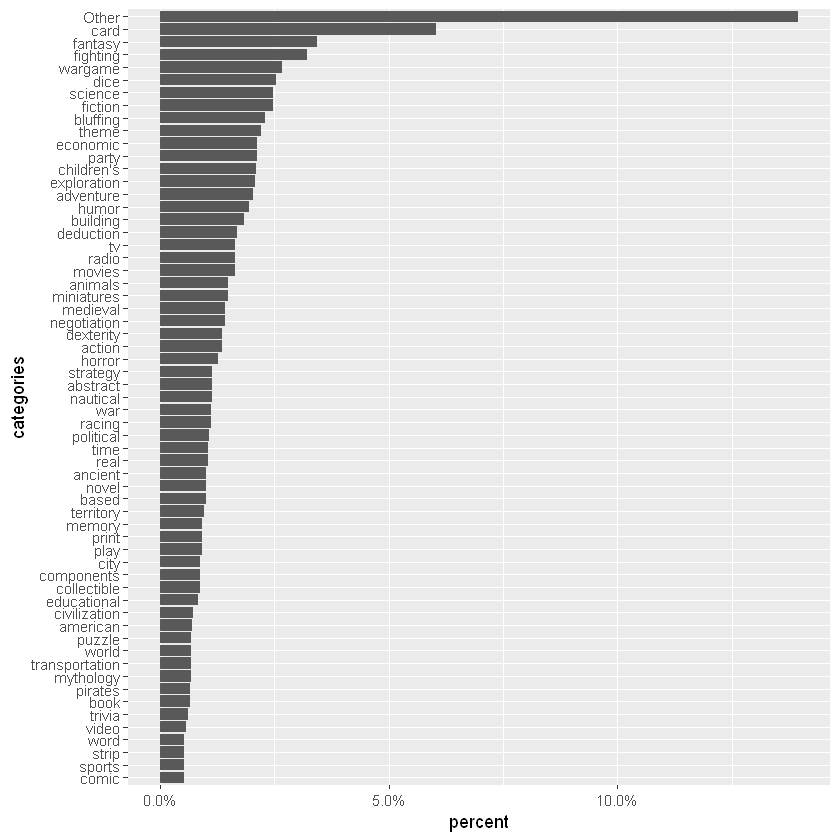

In [11]:
board_games %>% 
    distinct(category) %>%  
    unnest_tokens(categories, category)  %>%
    filter(categories != "game") %>% 
    mutate(categories = fct_lump(categories, 60)) %>% 
    count(categories, sort = TRUE) %>%
    mutate(categories = fct_reorder(categories, n), 
           percent = n / sum(n)) %>% 
    ggplot(aes(percent, categories)) +
        geom_col() +
        scale_x_continuous(labels = scales::percent_format())

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



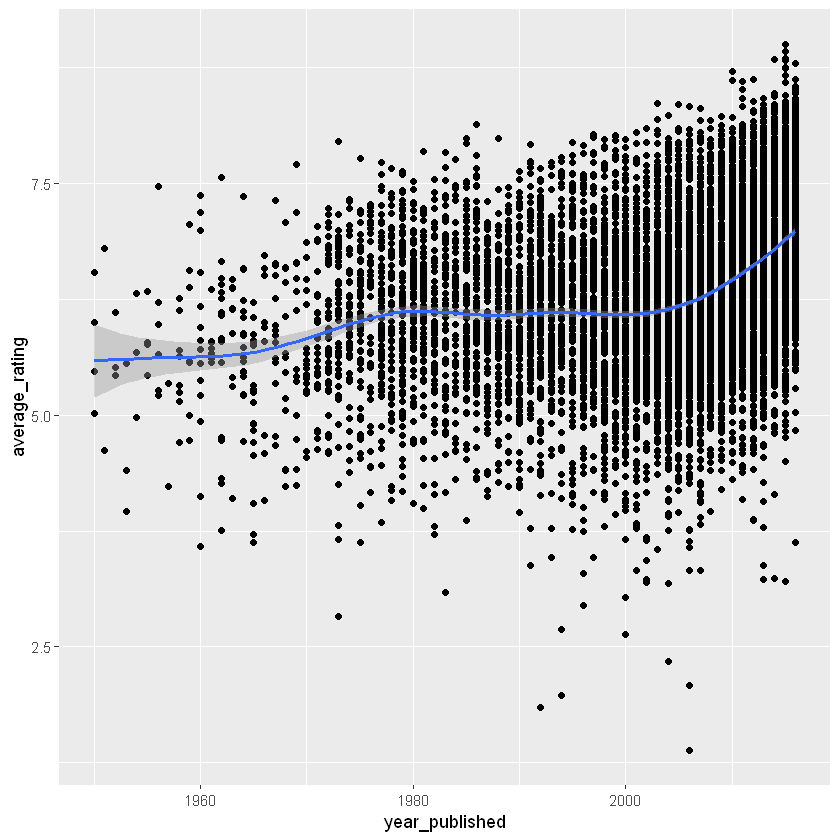

In [10]:
board_games %>% 
    ggplot(aes(year_published, average_rating)) +
        geom_point() +
        geom_smooth()

In [12]:
many_reviews <- board_games %>% 
                    select(name, average_rating, users_rated) %>% 
                    arrange(desc(users_rated), desc(average_rating)) %>% 
                    filter(users_rated > 20000, average_rating >= 7.5)
many_reviews

name,average_rating,users_rated
<chr>,<dbl>,<dbl>
Pandemic,7.67234,62377
Dominion,7.69995,55930
7 Wonders,7.83595,51688
Agricola,8.05581,48261
Puerto Rico,8.09157,47789
Power Grid,7.94499,42036
Ticket to Ride: Europe,7.59192,35535
Race for the Galaxy,7.77137,34242
Stone Age,7.63340,30432


[1] "game_id"        "description"    "image"          "max_players"   
 [5] "max_playtime"   "min_age"        "min_players"    "min_playtime"  
 [9] "name"           "playing_time"   "thumbnail"      "year_published"
[13] "artist"         "category"       "compilation"    "designer"      
[17] "expansion"      "family"         "mechanic"       "publisher"     
[21] "average_rating" "users_rated"

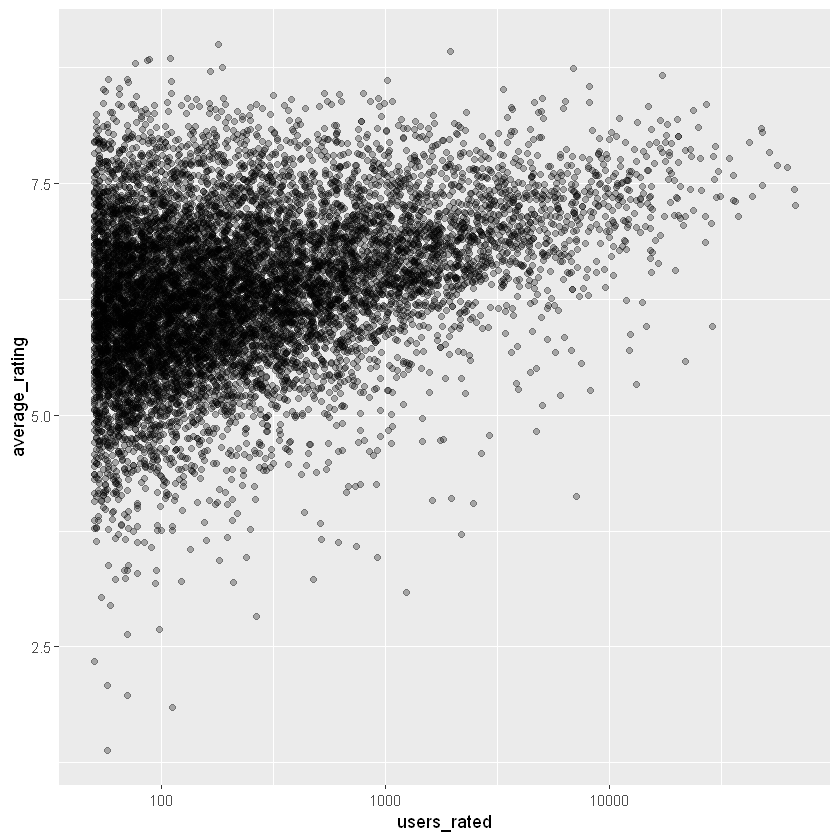

In [13]:
names(board_games)
board_games %>% 
    select(name, average_rating, users_rated) %>% 
    ggplot(aes(users_rated, average_rating)) +
        geom_point(alpha = 0.3) + 
        scale_x_log10()

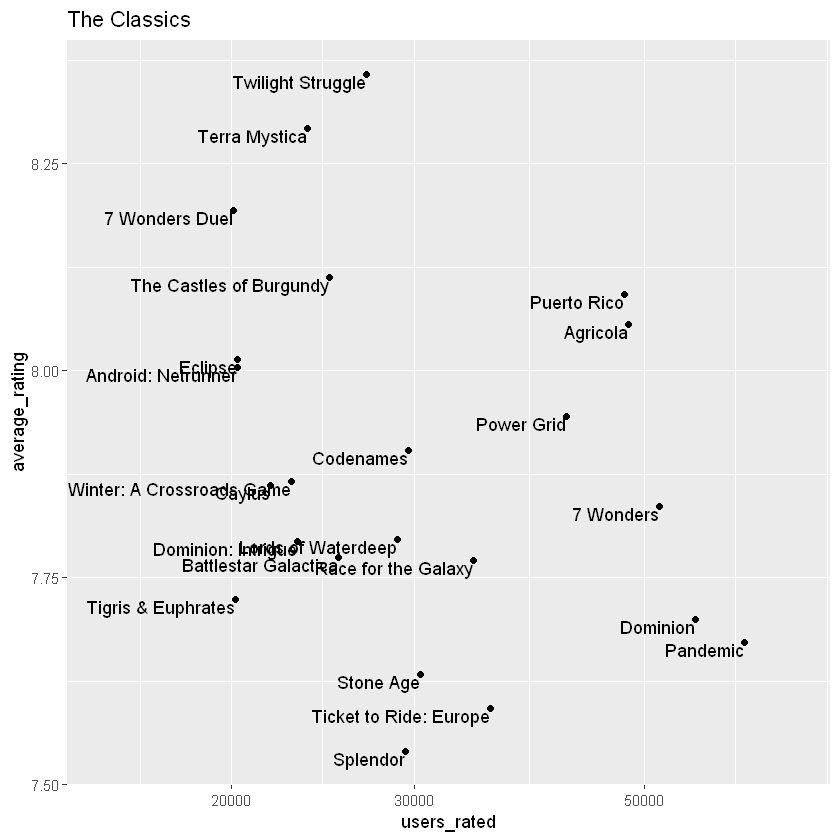

In [14]:
many_reviews %>% 
    ggplot(aes(users_rated, average_rating)) +
        geom_point() + 
        geom_text(aes(label = name), vjust = 1, hjust = 1) +
        scale_x_log10() +
        expand_limits(x = c(15000, 70000)) + 
        labs(title = "The Classics")

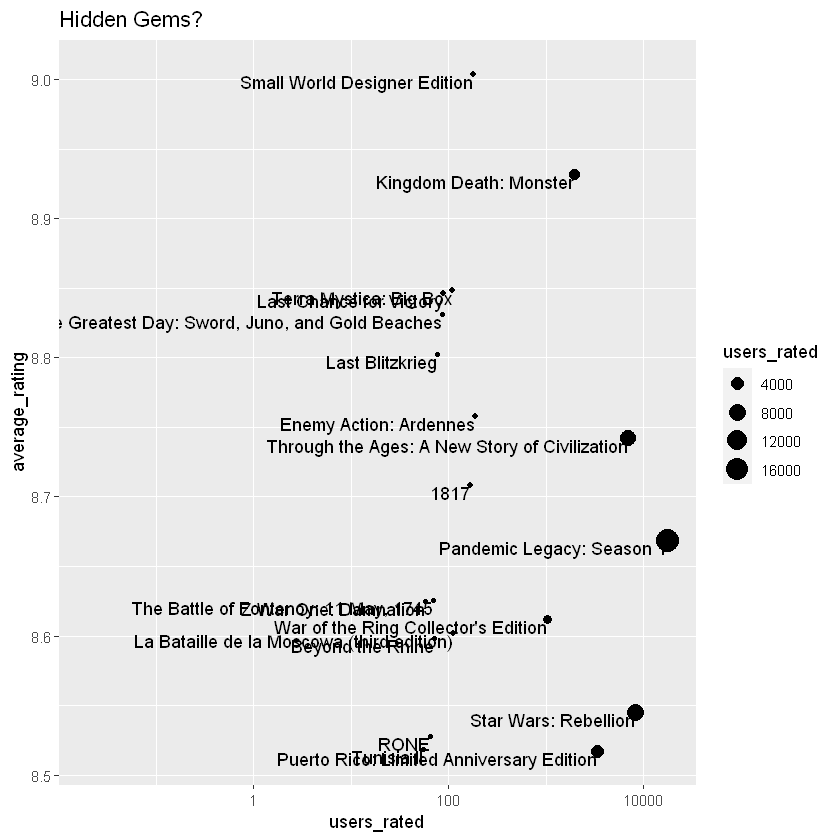

In [15]:
board_games %>%
    filter(average_rating > 8.5) %>% 
    ggplot(aes(users_rated, average_rating)) +
        geom_text(aes(label = name), vjust = 1, hjust = 1) +
        geom_point(aes(size = users_rated)) + 
        expand_limits(x = 0.02) + 
        scale_x_log10() +
        labs(title = "Hidden Gems?")

In [16]:
board_games %>% names()

[1] "game_id"        "description"    "image"          "max_players"   
 [5] "max_playtime"   "min_age"        "min_players"    "min_playtime"  
 [9] "name"           "playing_time"   "thumbnail"      "year_published"
[13] "artist"         "category"       "compilation"    "designer"      
[17] "expansion"      "family"         "mechanic"       "publisher"     
[21] "average_rating" "users_rated"

## Number of players

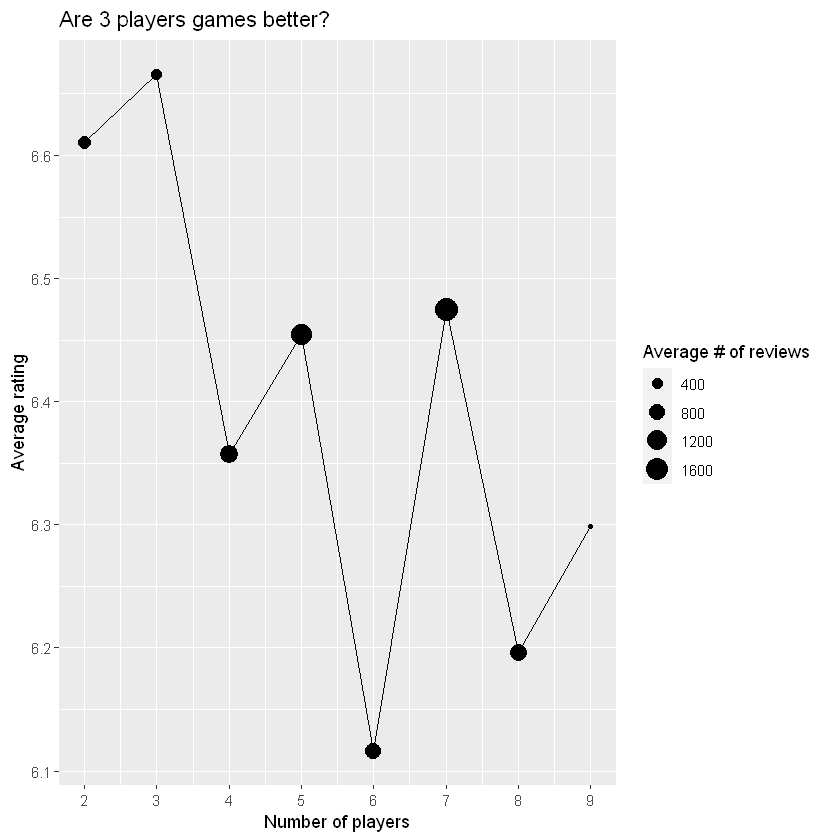

In [34]:
board_games %>%
    select(players = max_players, rating = average_rating, users_rated) %>% 
    filter(players > 1, players < 10, !is.na(rating)) %>% 
    group_by(players) %>% 
    summarise(rating = mean(rating), users_rated = mean(users_rated)) %>% 
    ggplot(aes(players, rating)) +
        geom_point(aes(size = users_rated)) +
        geom_line() +
        scale_x_continuous(breaks = seq(2, 10, 1)) +    
        labs(title = "Are 3 players games better?", 
             x = "Number of players", 
             y = "Average rating", 
             size = "Average # of reviews")
        

## Game Length

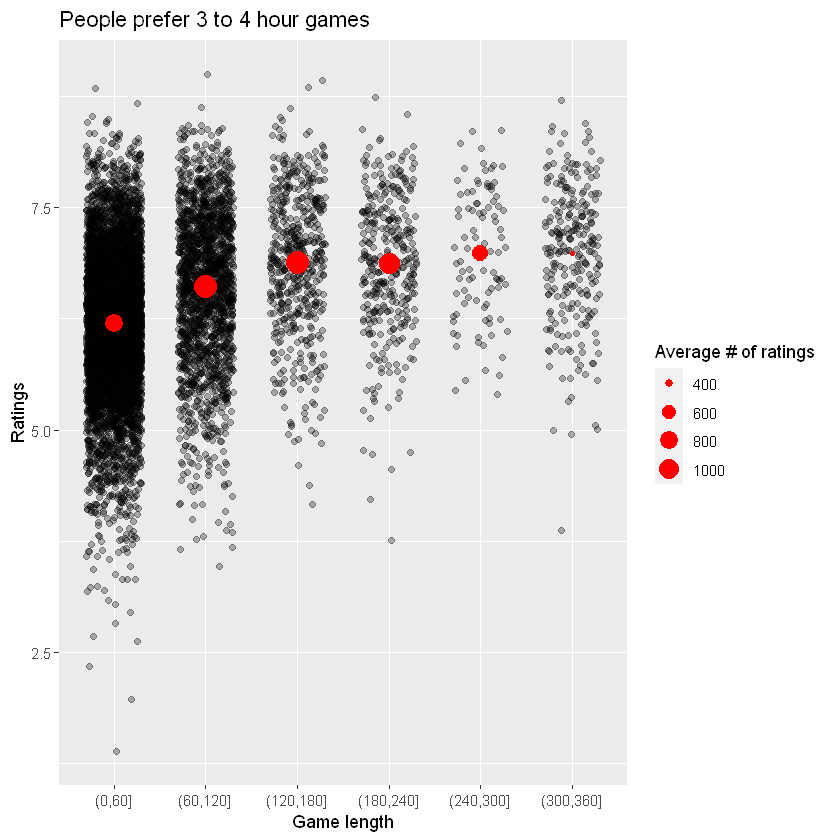

In [83]:
board_games %>%
    select(length = max_playtime, rating = average_rating, users_rated) %>% 
    filter(!is.na(rating), length < 600, length > 0) %>%
    mutate(length = ifelse(length > 60*6, 60*6, length), 
           length = cut(length, seq(0, 600, 60))) %>% 
    group_by(length) %>% 
    mutate(average_rating = mean(rating), 
           average_ratings = mean(users_rated)) %>% 
    ggplot(aes(length, rating)) +
        geom_jitter(width = 0.3, alpha = 0.3) +
        geom_point(aes(length, average_rating, size = average_ratings), color = "red") +
        labs(x = "Game length", 
             y = "Ratings", 
             size = "Average # of ratings", title = "People prefer 3 to 4 hour games")

## Longest and best?